# Project Business Statistics: E-news Express



## Define Problem Statement and Objectives

#### Problem Statement 
Executives at E-News Express, and online news portal, are of the opinion that there has been a decline in monthly subscriptions to the service compared to previous years. They believe the reason to be because the current webpage is not designed well enough in terms of the recommended content and outlines to keep consumers engaged long enough to make the decision to subscribe. The company uses A/B Testing to help determine which features attract more subscriptions. 
#### Objective
The design team has made a new, experimental landing page with a new outline and more relevant content to test if it can garner more subscriptions. Data was collected for both the new and the old webpages with a random sample of 50 customers for each. The following questions need to be answered using the data:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats 

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv('abtest.csv')
df=data.copy()
df=df.rename(columns={'time_spent_on_the_page':'time_spent'})

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
display(df.head())

,user_id,group,landing_page,time_spent,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

In [5]:
df.describe(include='all')

,user_id,group,landing_page,time_spent,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [6]:
df.drop_duplicates()

,user_id,group,landing_page,time_spent,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [43]:
df.isnull().sum()

user_id               0
group                 0
landing_page          0
time_spent            0
converted             0
language_preferred    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             100 non-null    int64  
 1   group               100 non-null    object 
 2   landing_page        100 non-null    object 
 3   time_spent          100 non-null    float64
 4   converted           100 non-null    object 
 5   language_preferred  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are no null values in the dataset, and the data types are accurate. 

In [7]:
df_control = df.loc[df['group']=='control']
df_treat = df.loc[df['group']=='treatment']

In [8]:
display(df_control.describe())
df_treat.describe()

,user_id,time_spent
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


,user_id,time_spent
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


### Univariate Analysis

In [9]:
df['user_id'].nunique()

100

group
control      50
treatment    50
Name: count, dtype: int64


<Axes: xlabel='group', ylabel='count'>

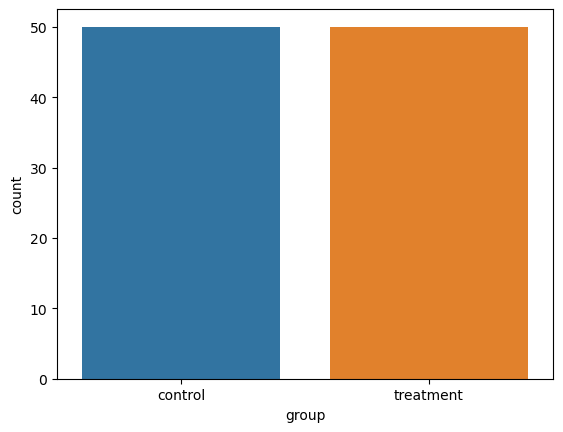

In [10]:
print(df['group'].value_counts())
sns.countplot(data=df,x='group')

landing_page
old    50
new    50
Name: count, dtype: int64


<Axes: xlabel='landing_page', ylabel='count'>

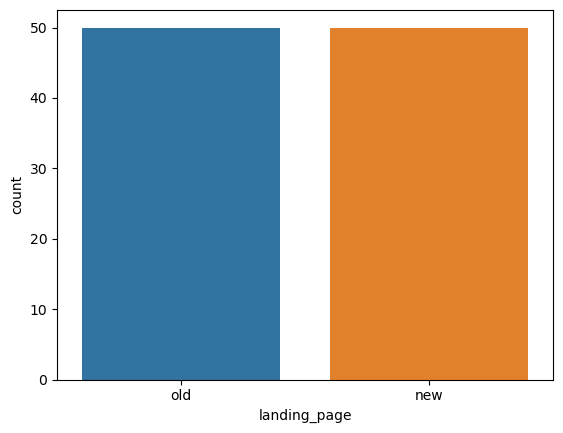

In [11]:
print(df['landing_page'].value_counts())
sns.countplot(data=df,x='landing_page')

5.377800000000001


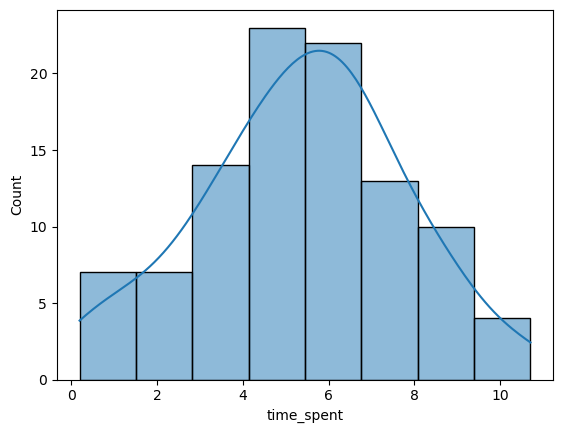

<Axes: xlabel='time_spent'>

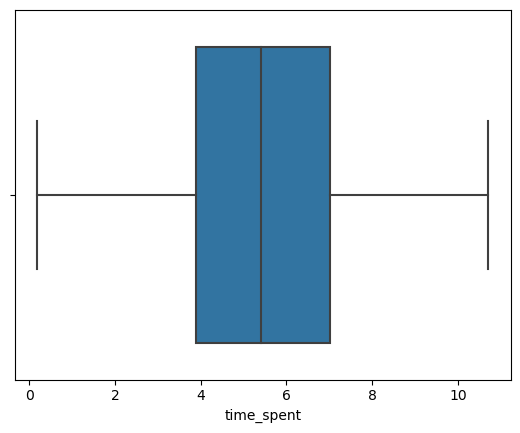

In [12]:
print(df['time_spent'].mean())
sns.histplot(data=df,x='time_spent',kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent')

converted
yes    54
no     46
Name: count, dtype: int64


<Axes: xlabel='converted', ylabel='count'>

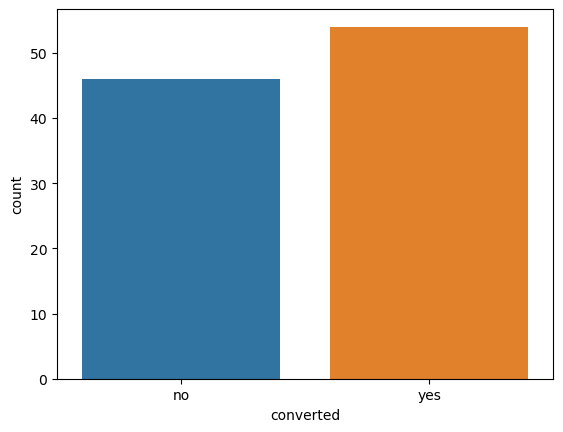

In [13]:
print(df['converted'].value_counts())
sns.countplot(data=df,x='converted')

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


<Axes: xlabel='language_preferred', ylabel='count'>

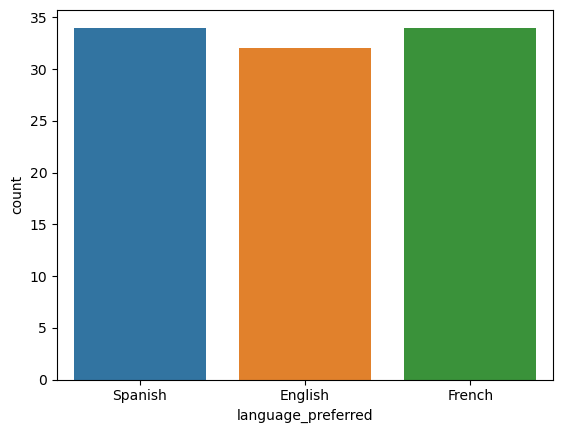

In [14]:
print(df['language_preferred'].value_counts())
sns.countplot(x=df['language_preferred'])

#### Univariate Analysis
There are 100 unique users in this sample. The group and the landing page variables are the same as they correspond to each other, with each having 100 counts. The histogram of the time spent variable shows a normal curve with the overall mean being arond 5.4 minutes and the max being almost 11 minutes. The boxplot shows that there are no outliers. The countplot of the converted variable shows that there were more users that subscribed in the study (54) than not (46). The countplot of the language preferred shows that of the 100 users, 32 preferred English, and 34 preferred Spanish and French each. 

### Bivariate Analysis

converted
no     3.915870
yes    6.623148
Name: time_spent, dtype: float64


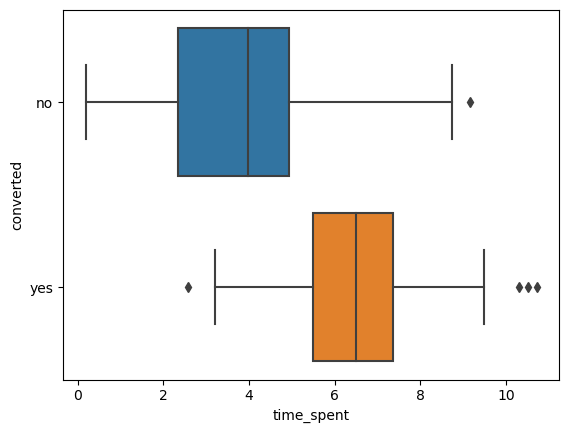

In [15]:
print(df.groupby('converted')['time_spent'].mean())
sns.boxplot(data=df, x='time_spent',y='converted')
plt.show()

group
control      4.5324
treatment    6.2232
Name: time_spent, dtype: float64


<Axes: xlabel='time_spent', ylabel='group'>

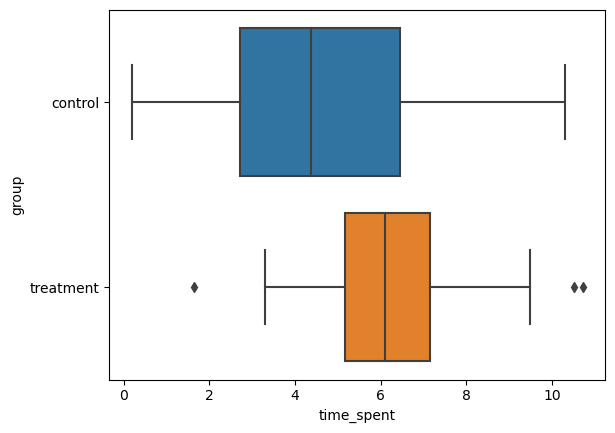

In [16]:
print(df.groupby('group')['time_spent'].mean())
sns.boxplot(data=df, x='time_spent', y='group')

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent, dtype: float64


<Axes: xlabel='time_spent', ylabel='language_preferred'>

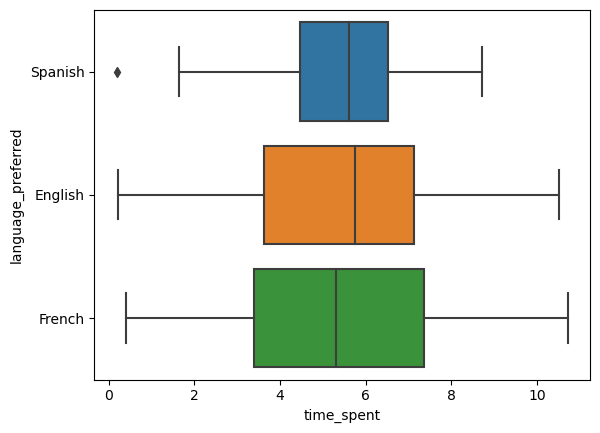

In [17]:
print(df.groupby(['language_preferred'])['time_spent'].mean())
sns.boxplot(data=df,x='time_spent',y='language_preferred')

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64


<Axes: xlabel='language_preferred', ylabel='count'>

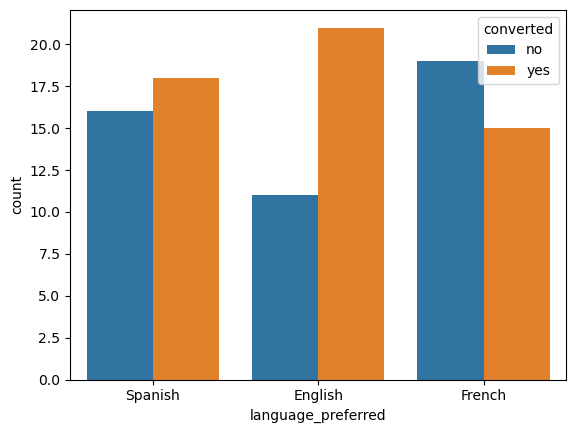

In [18]:
print(df.groupby('language_preferred')['converted'].value_counts())
sns.countplot(data=df, x='language_preferred', hue='converted')

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64


<Axes: xlabel='landing_page', ylabel='count'>

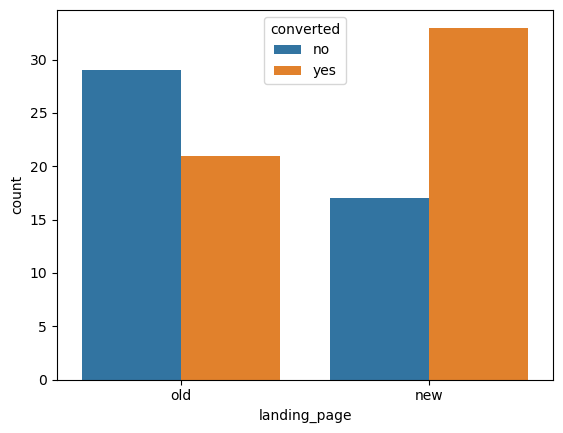

In [19]:
print(df.groupby('landing_page')['converted'].value_counts())
sns.countplot(data=df, x='landing_page', hue='converted')

#### Bivariate Analysis
* For time spent vs converted, the users that converted stayed on their landing page for longer than than those who didn't. On average, the users that converted spent 6.6 minutes on the page while those who didn't spent 3.9 minutes.
* For time spent vs group, the users that were on the new landing page spent longer on the page than those in the control groupl. The users in the treatment group spent 6.22 minutes on average on the page, and those in the control group spent 4.53 minutes on the page.
* For time spent vs language, it doesn't seem there is a strong bias towards a language as the means are close to each other at around 5 to 5.5 minutes. The boxplot also shows similar medians and IQR's. 
* For converted vs language, English had the highest conversion rate at 21 to 11, followed by Spanish at 18 to 16. French had more that didn't convert with a ratio of 15 to 19. There may be a bias here to investigate. 
* For converted vs landing page, the new landing page had a higher conversion rate at 33 to 17 while the old landing page had a low conversion rate at 21 to 29. There may be a bias here to investigate.  

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='time_spent', ylabel='landing_page'>

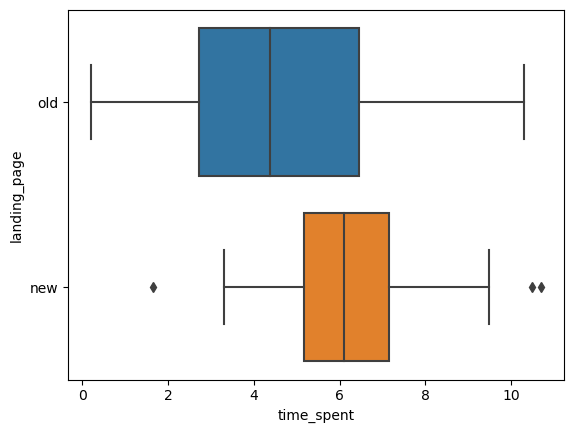

In [20]:
sns.boxplot(data=df,x='time_spent',y='landing_page')

### Step 1: Define the null and alternate hypotheses

>$H_0: \mu_t = \mu_c$


>$H_a: \mu_t > \mu_c$

### Step 2: Select Appropriate test

A 2-Sample independent t-test will be used. 
* The treatment and control groups are not depdendent on each other
* With a sample size of more than 30 for each, and with "time spent" being on a continuous scale, the data can be assumed to be normally distributed. 
* The population standard deviation of the old landing page is unknown. The standard deviations of the samples are unequal
* The samples were randomly chosen

### Step 3: Decide the significance level

The significance level will be 5%.

In [21]:
alpha = 0.05

### Step 4: Collect and prepare data

In [22]:
display(df_control.head())
df_treat.head()

,user_id,group,landing_page,time_spent,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


,user_id,group,landing_page,time_spent,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [23]:
print(df_control['time_spent'].std())
print(df_treat['time_spent'].std())

2.581974849306046
1.8170310387878263


### Step 5: Calculate the p-value

In [24]:
from scipy.stats import ttest_ind
test_stat1, p_val1 = ttest_ind(df_treat['time_spent'], df_control['time_spent'], equal_var=False, alternative='greater')
p_val1

0.0001392381225166549

### Step 6: Compare the p-value with $\alpha$

In [25]:
if p_val1 > alpha:
    print(f'The p-value of {round(p_val1,4)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val1,4)} is less than 5%, and we reject the null the hypothesis') 

The p-value of 0.0001 is less than 5%, and we reject the null the hypothesis


### Step 7:  Draw inference

Since the p-value obtained from the 2-sample t-test is less than the 5% level of significance, we reject the null hypothesis and can conclude that users spend more time on the new landing page than the old one. 

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<Axes: xlabel='landing_page', ylabel='count'>

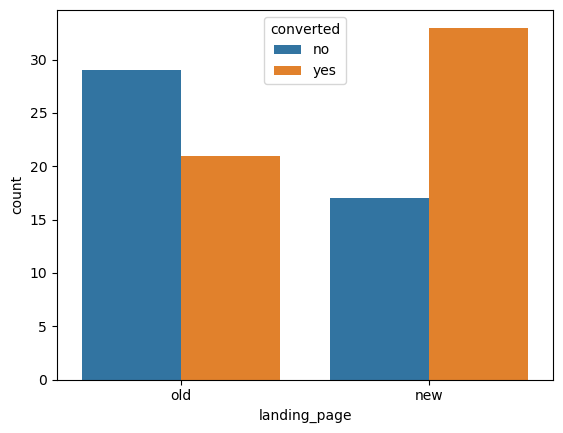

In [26]:
sns.countplot(data=df, x='landing_page', hue='converted')

>$H_0:  p_1 = p_2$

>$H_a: p_1 > p_2$

In [27]:
print('Converted for control group:')
print(df_control['converted'].value_counts())
print()
print('Converted for treatment group:')
print(df_treat['converted'].value_counts())

Converted for control group:
converted
no     29
yes    21
Name: count, dtype: int64

Converted for treatment group:
converted
yes    33
no     17
Name: count, dtype: int64


A 2-Sample Proportions Z-Test will be used in this test. The significance level is 5%. 
* The relevant data is binomially distributed, with converted being "yes" or "no"
* The sample was randomly selected
* The distribution can be approximated to be normal:
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

In [28]:
no_conv = np.array([33,21])
no_obs2 = np.array([50,50])

In [29]:
from statsmodels.stats.proportion import proportions_ztest

test_stat2, p_val2 = proportions_ztest(no_conv,no_obs2, alternative = 'larger')
p_val2

0.008026308204056278

In [30]:
if p_val2 > alpha:
    print(f'The p-value of {round(p_val2,4)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val2,4)} is less than 5%, and we reject the null the hypothesis')

The p-value of 0.008 is less than 5%, and we reject the null the hypothesis


Because the p-value is less than the 5% level of significance, we reject the null hypothesis and conlcude that the conversion rate is greater on the new page. 

## 3. Is the conversion and preferred language independent or related?

<Axes: xlabel='language_preferred', ylabel='count'>

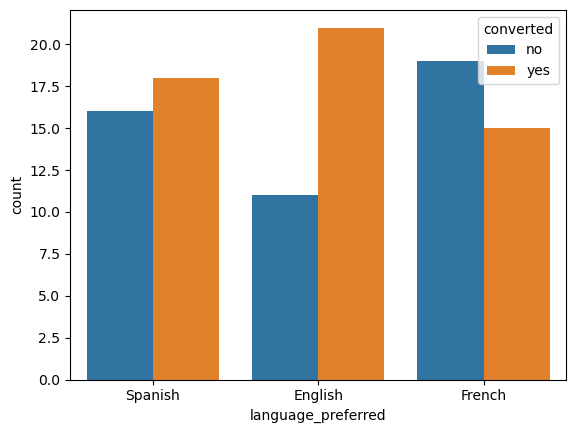

In [31]:
sns.countplot(data=df, x='language_preferred', hue='converted')

>$H_0:$ Conversion and Preferred Language are independent

>$H_a:$ Conversion and Preferred Language are not independent

A Chi-Squared Test for Independence will be used. The significance level is 5%. 
* The two variables are categorical
* Each level of the variable has at least 5 observations
* The sample was randomly selected

In [32]:
cross3 = pd.crosstab(df['converted'],df['language_preferred'])
cross3

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [33]:
from scipy.stats import chi2_contingency

chi, p_val3, dof, expected = chi2_contingency(cross3)
p_val3

0.21298887487543447

In [34]:
if p_val3 > alpha:
    print(f'The p-value of {round(p_val3,4)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val3,4)} is less than 5%, and we reject the null the hypothesis')

The p-value of 0.213 is greater than 5%, and we fail to reject the null the hypothesis


Because the p-value is larger than 5%, we fail to reject the null hypothesis and can conclude that the conversion rate and the preferred language are independent. 

## 4. Is the time spent on the new page same for the different language users?

<Axes: xlabel='time_spent', ylabel='language_preferred'>

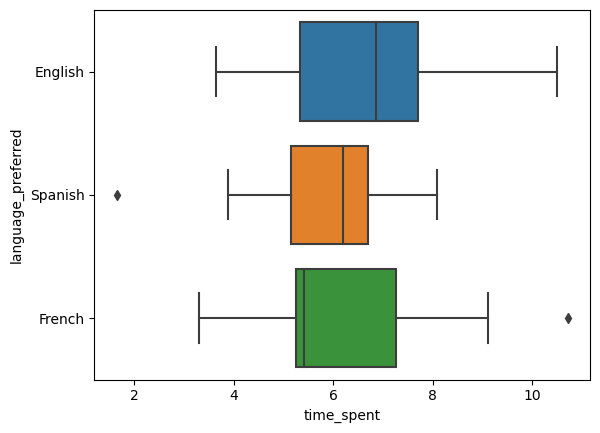

In [35]:
sns.boxplot(data=df_treat, x='time_spent', y='language_preferred')

Let $\mu_e, \mu_f,$ and $\mu_s$ denote the mean time spent on the landing page for English, French, and Spanish speakers respectively.
>$H_0: \mu_e = \mu_f = \mu_s$

>$H_a:$ At least one lanuage has a different time spent on the new landing page

A One-Way ANOVA test will be used. The level of significance is 5%.
* The sample passes the Shapiro-Wilk's Test - It is normally distributed
* The sample passes the Levene's Test - The variances are equal
* The sample was randomly selected

#### Shapiro-Wilk's Test

>$H_0:$ Time spent on the new landing page follows a normal distribution

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [36]:
shap, p_val_shap = stats.shapiro(df_treat['time_spent'])
p_val_shap

0.8040016293525696

In [37]:
if p_val_shap > alpha:
    print(f'The p-value of {round(p_val_shap,2)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val_shap,2)} is less than 5%, and we reject the null the hypothesis')

The p-value of 0.8 is greater than 5%, and we fail to reject the null the hypothesis


#### Levene's Test

>$H_0:$ The population variances are equal

>$H_a:$ At least one of the population variances is different

In [38]:
lev, p_val_lev = stats.levene(
    df_treat[df_treat['language_preferred']=='English']['time_spent'],
    df_treat[df_treat['language_preferred']=='French']['time_spent'],
    df_treat[df_treat['language_preferred']=='Spanish']['time_spent']
)
p_val_lev

0.46711357711340173

In [39]:
if p_val_lev > alpha:
    print(f'The p-value of {round(p_val_lev,3)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val_lev,3)} is less than 5%, and we reject the null the hypothesis')

The p-value of 0.467 is greater than 5%, and we fail to reject the null the hypothesis


#### One-way ANOVA

In [40]:
fstat4, p_val4 = stats.f_oneway(
    df_treat[df_treat['language_preferred']=='English']['time_spent'],
    df_treat[df_treat['language_preferred']=='French']['time_spent'],
    df_treat[df_treat['language_preferred']=='Spanish']['time_spent']
)
p_val4

0.43204138694325955

In [41]:
if p_val4 > alpha:
    print(f'The p-value of {round(p_val4,3)} is greater than 5%, and we fail to reject the null the hypothesis')
else:
    print(f'The p-value of {round(p_val4,3)} is less than 5%, and we reject the null the hypothesis')

The p-value of 0.432 is greater than 5%, and we fail to reject the null the hypothesis


Because the p-value is larger than 5%, we fail to reject the null hypothesis and conclude that the time spent on the new landing page is the same for the three languages. 

## Conclusion and Business Recommendations

To summarize the answers for the four questions:
1. Through a 2-Sample t-test, we concluded that users spend more time on the new landing page when compared with the old one. 
2. Through a 2-Sample Porportions Z-test, we concluded that the conversion rate is higher on the new page when compared with the old one. 
3. Through a Chi-Squared Test for Independence we concluded that conversion rate and preferred language are independent of each other.
4. Through a One-way ANOVA we concluded that the time spent on the new landing page is the same for the three preferred languages. 

#### Recommendations
* For additional data, it may be useful to record how many clicks a user made on the old vs the new landing page. This could give insight into how the different pages affect engagement for the users. Additional languages could also be observed to add variety to the data. An additional study could also be conducted with a larger sample size to give more accurate insight into how the users react to the landing page.  
* Since it was concluded that users spend more time and are more likely to convert with the new landing page, the company should emphasize pushing this out. It could potentially bring in more subscriptions and profit. 
* The tests showed there was no significant correlation between language and conversion rate/time spent on the landing page. As such, the company can spend resources to focus on other observations and data collection. If the company wants to bolster the conversion rate of a specific language, they can spend resources to do so also. For example, this sample shows that French speakers had the lowest conversion rate. Even if it may simply be due to random chance, the company can use this insight to potentially focus resources in the French market. 

___